In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

## Section 1

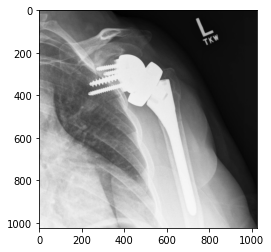

In [2]:
shoulder = cv2.imread("./shoulder.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(shoulder, cmap="gray");

## Section 2

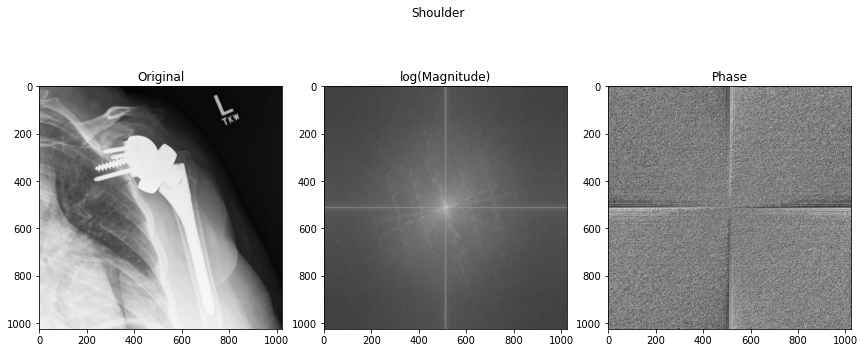

In [3]:
def fourier(image):
    fft = np.fft.fft2(image)
    fft = np.fft.fftshift(fft)
    return np.log(1 + np.abs(fft)), np.angle(fft), fft

def show_fourier(original=None, magnitude=None, phase=None, super_title="", figsize=(12, 6)):
    if magnitude is None and phase is None:
        magnitude, phase = fourier(original)
    
    fig, axs = plt.subplots(1, 3, figsize=figsize)
    fig.tight_layout()
    axs[0].imshow(original, cmap='gray')
    axs[0].set_title('Original')
    axs[1].imshow(magnitude, cmap='gray')
    axs[1].set_title('log(Magnitude)')
    axs[2].imshow(phase, cmap='gray')
    axs[2].set_title('Phase')
    fig.suptitle(super_title)
    plt.show()

magnitude, phase, fft = fourier(shoulder)
show_fourier(original=shoulder, magnitude=magnitude, phase=phase, super_title="Shoulder")

## Section 3

In [4]:
def distance(i, j, shape):
    cx, cy = shape[0] // 2, shape[1] // 2
    return ((i - cx) ** 2 + (j - cy) ** 2) ** 0.5
def ideal_low_pass_filter(shape, r):
    return np.fromfunction(lambda i,j: distance(i, j, shape) ** 2 <= r ** 2, shape, dtype=float)

def gaussian_filter(shape, r):
    return np.fromfunction(lambda i,j: np.exp(-distance(i, j, shape) ** 2 / (2 * r** 2)), shape, dtype=float)  

def butterworth_filter(shape, r):
    return np.fromfunction(lambda i,j: 1 / (1 + (distance(i, j, shape) / r) ** 4), shape, dtype=float)

def get_highpass(lp):
    return np.ones(lp.shape) - lp

def inverse_fourier(f):
    ishift_f = np.fft.ifftshift(f)
    image = np.fft.ifft2(ishift_f)
    image = np.abs(image)
    return image

def logabs(x):
    return np.log(1 + np.abs(x))

## Section 4

In [5]:
shape = fft.shape
shape

(1024, 1024)

### C = 30

In [6]:
c = 30
ideal_fft_30 = fft * get_highpass(ideal_low_pass_filter(shape, c))
gaussian_fft_30 = fft * get_highpass(gaussian_filter(shape, c))
butterworth_fft_30 = fft * get_highpass(butterworth_filter(shape, c))

### c = 100

In [7]:
c = 100
ideal_fft_100 = fft * get_highpass(ideal_low_pass_filter(shape, c))
gaussian_fft_100 = fft * get_highpass(gaussian_filter(shape, c))
butterworth_fft_100 = fft * get_highpass(butterworth_filter(shape, c))

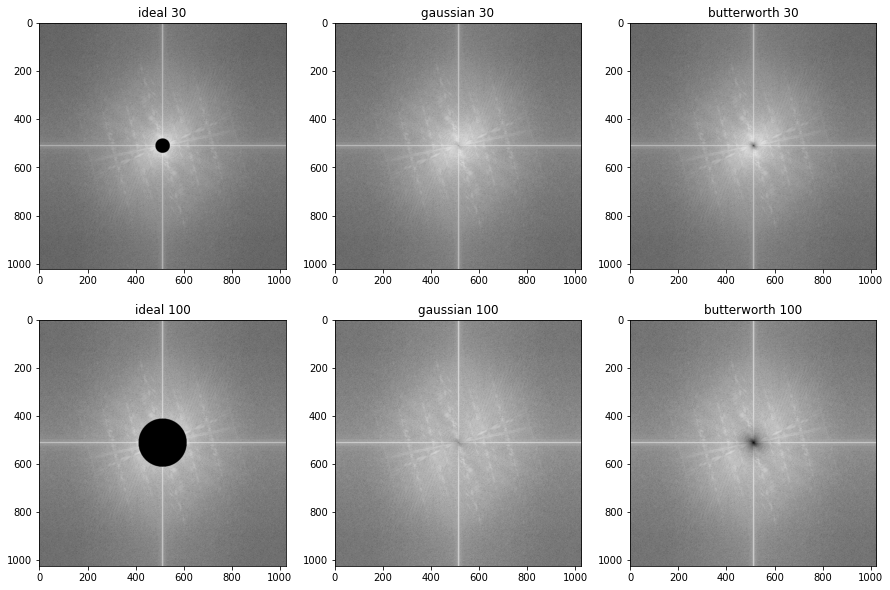

In [8]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs[0, 0].imshow(logabs(ideal_fft_30), cmap='gray')
axs[0, 0].set_title('ideal 30')

axs[0, 1].imshow(logabs(gaussian_fft_30), cmap='gray')
axs[0, 1].set_title('gaussian 30')

axs[0, 2].imshow(logabs(butterworth_fft_30), cmap='gray')
axs[0, 2].set_title('butterworth 30')

axs[1, 0].imshow(logabs(ideal_fft_100), cmap='gray')
axs[1, 0].set_title('ideal 100')

axs[1, 1].imshow(logabs(gaussian_fft_100), cmap='gray')
axs[1, 1].set_title('gaussian 100')

axs[1, 2].imshow(logabs(butterworth_fft_100), cmap='gray')
axs[1, 2].set_title('butterworth 100')
plt.show()

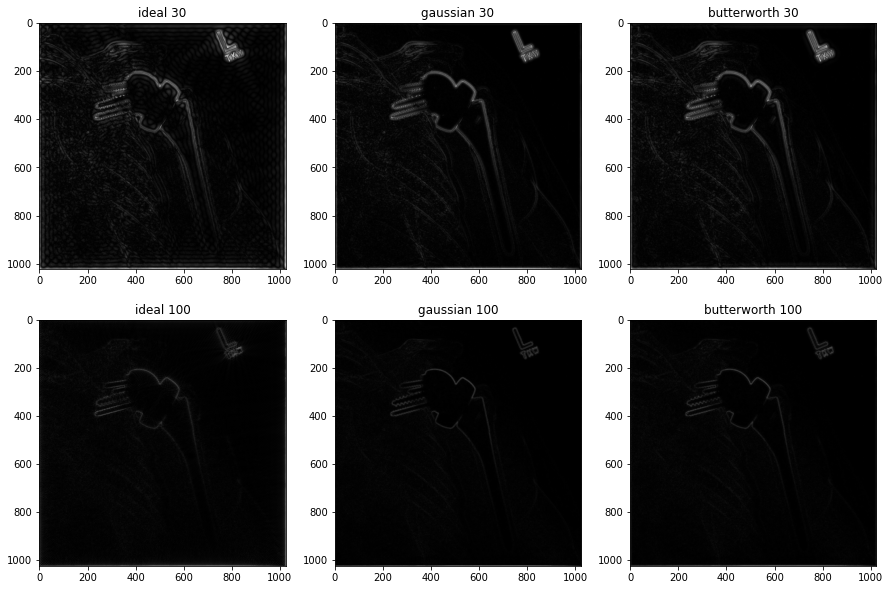

In [9]:
image_i30 = inverse_fourier(ideal_fft_30)
image_i100 = inverse_fourier(ideal_fft_100)
image_g30 = inverse_fourier(gaussian_fft_30)
image_g100 = inverse_fourier(gaussian_fft_100)
image_b30 = inverse_fourier(butterworth_fft_30)
image_b100 = inverse_fourier(butterworth_fft_100)

fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs[0, 0].imshow(image_i30, cmap='gray')
axs[0, 0].set_title('ideal 30')

axs[0, 1].imshow(image_g30, cmap='gray')
axs[0, 1].set_title('gaussian 30')

axs[0, 2].imshow(image_b30, cmap='gray')
axs[0, 2].set_title('butterworth 30')

axs[1, 0].imshow(image_i100, cmap='gray')
axs[1, 0].set_title('ideal 100')

axs[1, 1].imshow(image_g100, cmap='gray')
axs[1, 1].set_title('gaussian 100')

axs[1, 2].imshow(image_b100, cmap='gray')
axs[1, 2].set_title('butterworth 100')
plt.show()